![Texto](https://dadosaocubo.com/wp-content/uploads/2020/06/DADOS-AO-CUBO-Vers%C3%A3o-04-1.png) 

[__D³__](https://dadosaocubo.com/) by [__Tiago Dias__](https://www.linkedin.com/in/diasctiago/) 

Este é o primeiro post da trilha de modelos de Machine Learning (ML), vamos começar com os mais básicos e evoluir até chegar em modelos mais complexos. Mas que raios são esses tais modelos? Modelos de ML são algoritmos com funções matemáticas treinados para reconhecer determinados padrões e realizar predições a partir desses padrões. Mas não é esse monstro todo que parece, vamos por partes igual ao Jack.

Neste post vamos abordar um dos modelos mais “básicos” de ML, mas não menos importante. A regressão linear apesar de um modelo relativamente simples, se comparado a outros que abordaremos nos próximos posts, tem um grande poder de predição e é solução para diversos problemas comuns. Antes de ver a sua aplicação com a biblioteca scikit-learn, vamos ver alguns conceitos importantes que não devem ser esquecidos.

POST: [Regressão com scikit-learn](https://)

# Regressão linear

A regressão linear pode ser definida pela estatística como uma equação que busca estimar o(s) valor(es) de **y**, dados uma ou mais variáveis **x**. Sendo definido pela equação matemática:

$$ y = a + bx $$

Onde y é a variável dependente de x, a é o coeficiente linear e b é o coeficiente angular. Calma que não é tão difícil quanto parece, na prática é bem mais simples, vamos em frente.
Curiosidades:
*   Apesar do nome, a regressão linear também lida com relações não 
lineares.
*   Em problemas de regressão, as variáveis independentes podem ser numéricas ou categóricas, enquanto a variável explicada (dependente) é sempre numérica.

#### Teoria

Para ficar mais claro a nossa equação da regressão linear, podemos observar as variáveis **a** que vai definir o deslocamento da reta e a variável **b** que vai definir a inclinação da reta representada na figura abaixo.

<img src="https://raw.githubusercontent.com/dadosaocubo/regressao_linear/master/RegLinear.png" width="350"/>

Nesta figura temos um exemplo onde a variável **y** é dependente de apenas uma variável **x**, mas nos problemas do mundo real, normalmente o que temos é a variável **y** dependente de várias variáveis **x**.

$$ y = b_{0} + b_{1}x_{i1} + b_{2}x_{i2} + ... + + b_{p}x_{ip} $$

Onde vamos ter o número p de variáveis **x**, onde **i** denota a **i**-ésima observação do conjunto de treino. Mas não vamos nos preocupar com o tamanho da conta que o algoritmo vai fazer, para nós o importante nesse momento é entender o conceito por trás da fórmula.




#### Prática

Aplicando todos esses conceitos e fórmulas que vimos acima, vamos utilizar o python e sua poderosa biblioteca para ML a [scikit-learn](https://scikit-learn.org/stable/index.html) lá podemos encontrar o famoso dataset com os preço de casas em Boston, disponível na prória biblioteca do scikit-learn como [load_boston()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html). Mas o que é o scikit-learn? 

![scikit-learn](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

Essa biblioteca possui um conjunto de ferramentas para pré-processamento de dados e modelos de aprendizagem de máquina, inclusive a regressão linear, que se encontra no módulo **linear_model**, juntamente com outros modelos lineares. Mas vamos explorar todos os seus poderes especiais em diversos outros posts.

Com os dados desse dataset é possível baseado nas suas features (variáveis independentes ou o **x**), fazer predições do target (variável dependente ou o **y**) neste problema o preço das casas em Boston.

Dada essa introdução de alguns conceitos essenciais, vamos pegar os dados desse dataset, dividi-lo em duas partes, uma parte vamos utilizar para treinar o modelo (vamos mostrar ao modelo um conjunto de dados com as entradas e saídas conhecidas) e a outra parte que até então desconhecida pelo modelo, vamos usar para testar (vamos mostrar ao modelo um conjunto de dados com as entradas para que ele faça uma predição das saídas), esse seria um modelo supervisionado, quando temos dados rotulados, nossa saída já é conhecida e usamos ela para treinar o modelo, já o modelo semi-supervisionado e o não supervisionado abordaremos em outros posts para não perder o foco.

Para começar vamos importar as bibliotecas necessárias para carga, tratamento e visualização dos dados, para criação do modelo e avaliação do mesmo.

##### Importando bibliotecas

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Após carregar nossas bibliotecas, vamos carregar o nosso dataset para resolver nosso problema de regressão linear, nossos dados está dentro de uma das bibliotecas que foi carregada, o scikit-learn disponibiliza através do sklearn.datasets um conjunto de datasets para serem utilizados como exemplos e de lá selecionamos o **load_boston**, vamos ver agora como carregar ele.

##### Carregando dados do dataset de Boston

In [67]:
# Selecionando os dados do load_boston
boston = load_boston()
# Atribuindo as variáveis features, target, feature_names os seus valores correspondentes
features, target, feature_names = boston.data, boston.target, boston.feature_names
# Transformamos com o pandas esses dados em um DataFrame
df = pd.DataFrame(data=features, columns=feature_names)
# Juntamos ao DataFrame o target(y), nossa saida
df['PRICE'] = target
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


##### Visualizando dados

Vamos ter alguns posts específicos só para ensinar e dar dicas sobre a exploração de dados, uma parte fundamental para a criação do modelo, sem conhecer os dados fica complicado criar um modelo eficiente para o problema.
Mas vamos ver aqui duas funções clássicas do pandas(biblioteca open source utilizada para visualização e manipulação de dados):

*   **describe()** - lista as variáveis e mostra alguns dados estatísticos básicos como (mínimo, máximo, média, e outros) não deixe de conferir o post sobre estatística para saber mais sobre esses dados ([Estatística Descritiva Univariada](https://dadosaocubo.com/estatistica-descritiva-univariada/)).
*   **info()** - lista informações sobre as colunas, utilizei para sabe se todas as features (x), nossas entradas eram numéricas e se não tinham dados nulos, pré requisitos para os modelos de regressão linear.

Após analisar estas funções podemos ir para nosso modelo de regressão linear. Só lembrando que estamos tratando do conceito da regressão linear, então pode parecer está faltando algumas etapas (como é um dataset de exemplo podemos pular algumas etapas para fins de demonstração, pois os dados já foram tratados) ná dúvida sobre as etapas dos projetos de ciência de dados pode conferir neste post ([Pipeline dos Projetos de Ciência de Dados](https://dadosaocubo.com/pipeline-dos-projetos-de-ciencia-de-dados/)).



In [68]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


##### LinearRegression

Vamos começar selecionando nossas features e target, entradas e saidas ou simplismente X e y são nomes comuns que podem aparecer na literatura. Para ficar mais didático vamos selecionar apenas uma variável de entrada.

Selecionando Variáveis para o modelo

In [70]:
X = df[['LSTAT']]
y = df.PRICE

Após a seleção do X e y, como falado anteriormente, vamos dividir nossos dados em treino e teste para que possamos após a criação do modelo testar a performance do mesmo.

Dividindo os dados em treino e teste

A variável **test_size** vai definir o tamanho dos nossos dados selecionados para teste, o tamanho dessa divisão, não existe uma regra para isso, vai depender de cada problema e principalmente do tamanho do conjunto de dados que temos para treino.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Com nossos dados de treino dividido, podemos criar o modelo, que é uma tarefa relativamente simples, na prática o mais dificil é saber: Qual melhor modelo usar? Quais são os melhores hiperparâmetros? Mas essas e outras dúvidas vamos responder em outros posts.

Criando o modelo

In [72]:
# Criando o modelo LinearRegression
regr = LinearRegression()
# Realizar treinamento do modelo
regr.fit(X_train, y_train)
# Realizar predição com os dados separados para teste
y_pred = regr.predict(X_test)
# Visualização dos 20 primeiros resultados
y_pred[:20]

array([17.18471224, 31.49770516,  6.61946352, 32.75950848, 22.24134198,
       16.38431461, 20.82887557, 29.39783843, 23.55964396, 29.87807701,
       29.99107433,  6.98670479, 29.21892602, 17.87211256, 20.63113027,
       18.45593201, 26.84598246, 30.24531828, 21.29028126,  9.48206211])

Lembra quando nós definimos a função da regressão linear? 
$$ y = a + bx $$ 
Abaixo nós temos o resultado de **a** o coeficiente linear e **b** o coéficiente angular do nosso modelo gerado, dados esses valores conseguimos prever qualquer ponto da reta somente com o valor de **x**, então temos o nosso modelo de regressão linear.





In [73]:
print('Coeficiente Angular:', regr.coef_)
print('Coeficiente Linear:', regr.intercept_)

Coeficiente Angular: [-0.94164427]
Coeficiente Linear: 34.56746548140728


E agora? Terminanos? Nosso modelo ficou bom? Ainda precisamos avaliar nosso modelo afim de saber se ele resolve nosso problema com um erro aceitável. Erro? Não pode ter erro. Calma, os modelos são calculos baseados em estatisticas então sempre vamos ter um erro, o que podemos fazer é minimizar esse erro, para que ele seja aceitável para o nosso problema.

#### Validação de regressão

Vejamos o gráfico abaixo, em azul nossa linha de regressão linear, em laranja nossas saidas originais, nosso erro é dado por **e** que é a diferença entre a saida original e a saida prevista pelo modelo, essa diferença pode ser positiva ou negativa e isso vai influenciar tambem na nossa analise de erro, vamos analisar o **erro médio absoluto**, o **erro quadrático médio** e o **coeficiente de determinação**.

<img src="https://raw.githubusercontent.com/dadosaocubo/regressao_linear/master/RegLinearErro.png" width="350"/>

##### Erro Médio Absoluto (Median Absolute Error)

O erro médio absoluto (MAE) é a média da soma de todos os **e** do nosso gráfico de erros, as sua análise sofre uma interferencia devido aos erros positivos e negativos se anularem.

Para calcular o MAE do nosso modelo podemos usar o código abaixo.

In [74]:
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

MAE: 4.29


##### Erro Quadrado Médio (Mean Squared Error)

O erro quadrado médio (MSE) é a média da soma de todos os **e** elevados ao quadrado do nosso gráfico, o fato de ele ter as diferencas elevadas ao quadrados resolve o problema de os erros positivos e negativos se anularem, sendo mais preciso que o MAE.

Para calcular o MSE do nosso modelo podemos usar o código abaixo.




In [75]:
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

MSE: 34.68


##### Coeficiente de Determinação (R2 Score)

O coeficiente de Determinação (R²) varia entre 0 e 1 e expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Explicando a variância da variável dependente a partir da variável independente.

No nosso exemplo o R² = 0,59 significa que o modelo linear explica 59% da variância da variável dependente a partir da variável independente.

In [76]:
print('R2 Score: %.2f' % r2_score(y_test, y_pred))

R2 Score: 0.54


Dada as explicações para avaliação do modelo, vamos visualizar os dados reais de forma gráfica para fixar os conhecimentos.

##### Visualizando os resultados


Podemos no gráfico abaixo, os pontos pretos que representam os nossos dados reais e em azul a reta de regressão linear do nosso modelo, dá para observar que temos dados um tanto dispersos, o que não faz o nosso modelos performar tão bem. Ao longo dos próximos posts vão entender melhor como melhorar nossos modelos, tratar os dados dispersos, incluir novas variáveis de entrada entre outras técnicas que podem ser aplicadas. 

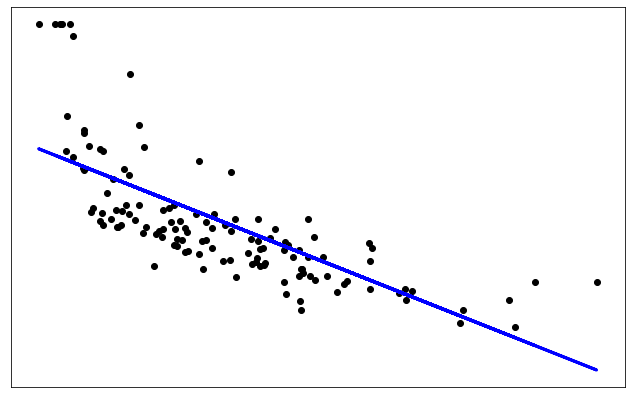

In [77]:
plt.rcParams['figure.figsize'] = (11,7)
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

### Referências
*   [Introduction to Machine Learning Algorithms: Linear Regression](https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a)
*   [Regressão linear](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear)
*   [Understanding Regression Error Metrics in Python](https://www.dataquest.io/blog/understanding-regression-error-metrics/)